In [2]:
import networkx as nx
import random
from pyvis.network import Network
import matplotlib.pyplot as plt
import itertools as it
from networkx.algorithms import bipartite
%matplotlib inline

In [34]:
# проверка плоскости по теореме Куратовского
while True:
    G = nx.gnm_random_graph(15, 20)
    if nx.check_planarity(G) and nx.is_connected(G):
        break

In [35]:
import random

vals = [1, -1]

for i in G.edges():
    G.edges[i]['weight'] = random.choice(vals)
    
for i in G.nodes():
    G.nodes[i]['num'] = i

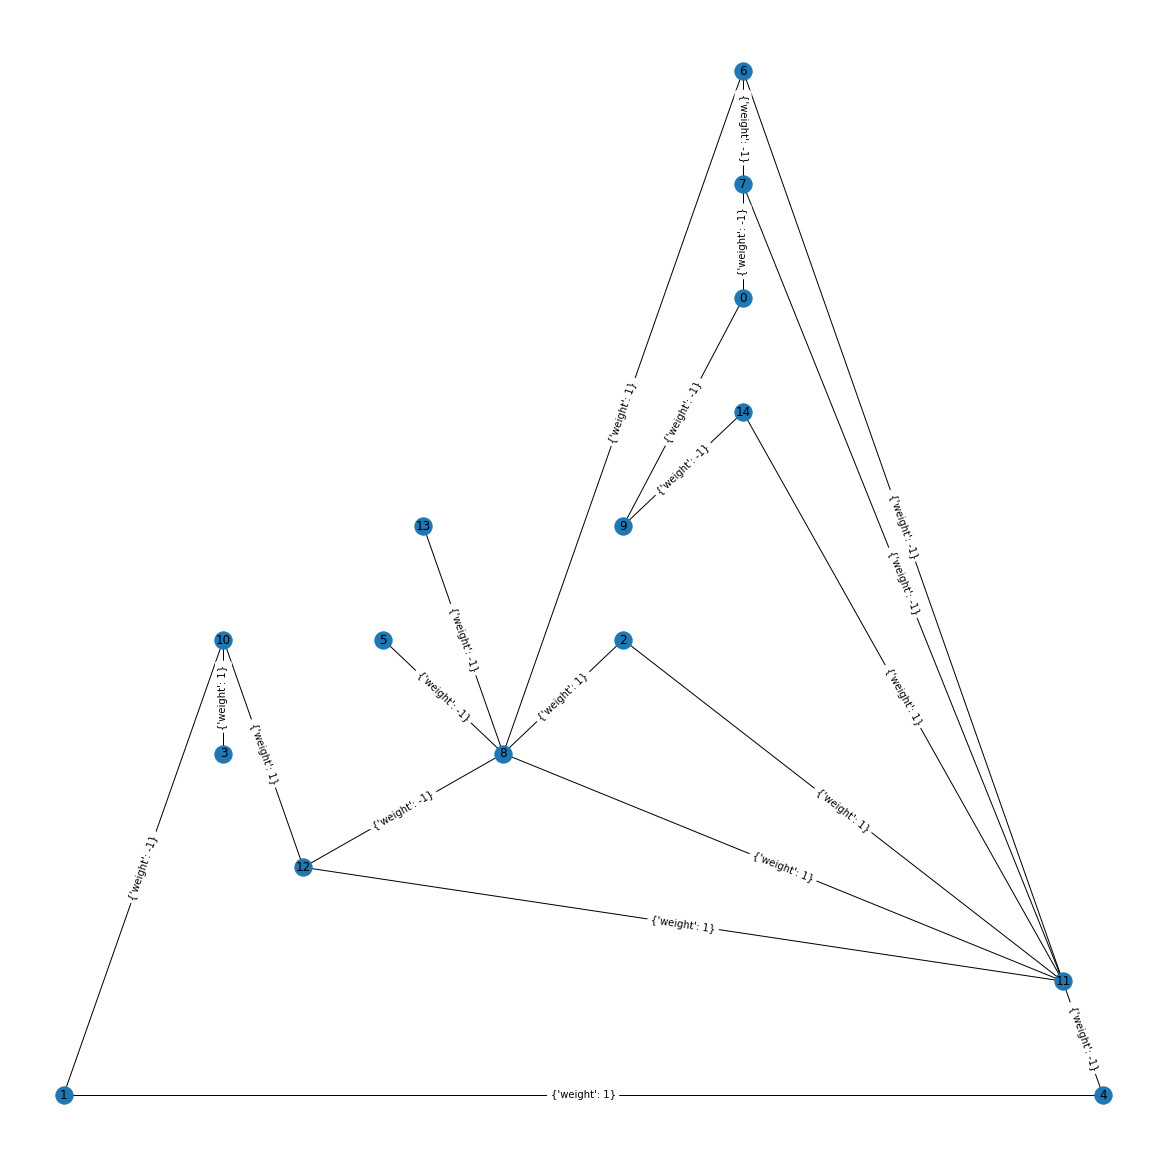

In [36]:
#визуализация начального графа
plt.figure(3,figsize=(16,16)) 
pos = nx.planar_layout(G)

nx.draw(G, pos=pos)

_labels = nx.get_edge_attributes(G,'weight')
_node_labels = nx.get_node_attributes(G,'num')
nx.draw_networkx_edge_labels(G, pos, labels = _labels, font_size = 10)
nx.draw_networkx_labels(G, pos, labels = _node_labels, font_size = 12)


plt.show()

In [40]:
#проверяется баланс всех возможных циклов

import numpy as np
cycles = [c for c in nx.cycle_basis(G)]
cycle_types={}
for cycle in cycles:
    tri=nx.subgraph(G,cycle)
    cycle_types[tuple(tri.nodes())]=np.product([x[2]['weight'] for x in tri.edges(data=True)])
print(cycle_types)

{(0, 7, 9, 11, 14): 1, (8, 11, 12): -1, (1, 4, 10, 11, 12): 1, (8, 2, 11): 1, (8, 11, 6): -1, (11, 6, 7): -1}


Как видно по визуализации графа и по полученным циклам, то действительно есть отрицательные значения => граф не сбалансирован

In [41]:
# работа с обычным графом из 100 вершин

G = nx.gnp_random_graph(100, 0.6)
vals = [1, -1]

for i in G.edges():
    G.edges[i]['weight'] = random.choice(vals)
    
for i in G.nodes():
    G.nodes[i]['num'] = i

In [44]:
cycles = [c for c in nx.cycle_basis(G)]
cycle_types={}
for cycle in cycles:
    tri=nx.subgraph(G,cycle)
    cycle_types[tuple(tri.nodes())]=np.product([x[2]['weight'] for x in tri.edges(data=True)])
print(cycle_types)

{(0, 1, 99): 1, (99, 0, 3): 1, (0, 99, 7): 1, (99, 0, 11): 1, (0, 99, 13): 1, (0, 99, 14): -1, (0, 99, 15): 1, (0, 17, 99): 1, (0, 18, 99): -1, (0, 99, 20): -1, (0, 99, 21): -1, (99, 0, 27): 1, (0, 99, 29): -1, (0, 99, 30): -1, (32, 0, 99): -1, (0, 33, 99): 1, (99, 0, 35): 1, (0, 99, 38): 1, (40, 0, 99): -1, (0, 99, 44): -1, (0, 99, 45): 1, (0, 99, 46): -1, (99, 0, 51): 1, (0, 99, 53): 1, (0, 99, 54): -1, (56, 0, 99): 1, (0, 58, 99): 1, (0, 99, 60): -1, (0, 99, 61): -1, (0, 99, 68): -1, (0, 99, 69): -1, (0, 99, 70): -1, (72, 0, 99): 1, (0, 73, 99): -1, (0, 74, 99): -1, (99, 0, 75): -1, (99, 0, 83): -1, (0, 99, 84): -1, (0, 99, 86): -1, (0, 99, 87): -1, (88, 0, 99): 1, (99, 0, 91): 1, (0, 99, 93): 1, (96, 0, 99): -1, (1, 98, 99): -1, (99, 98, 3): 1, (0, 98, 99, 5): 1, (8, 98, 99): -1, (0, 9, 98, 99): 1, (99, 98, 11): -1, (98, 99, 13): -1, (98, 99, 14): -1, (98, 99, 15): -1, (17, 98, 99): 1, (99, 98, 19): 1, (98, 99, 20): 1, (0, 98, 99, 22): 1, (24, 0, 98, 99): -1, (0, 25, 98, 99): -1, (

Имеется большое количество циклов, при этом как с положительным, так и с отрицательным весом => граф является не сбалансированным

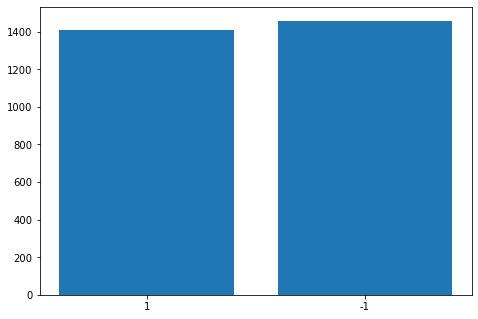

In [47]:
pos = sum(1 for v in cycle_types.values() if v == 1)
neg = sum(1 for v in cycle_types.values() if v == -1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1', '-1']
vals = [pos, neg]
ax.bar(langs,vals)
plt.show()

# Домашнее задание

In [76]:
deleted_edges = []
added_edges = []
balances = []


for i in range(5):
    edges = list(G.edges)
    nodes = list(G.nodes)
    add = []
    delete = []
    for _ in range(5):
        random_edge = random.choice(edges)
        delete.append(random_edge)
        G.remove_edge(random_edge[0], random_edge[1])
    while len(add)<5:
        node_1 = random.choice(nodes)
        node_2 = random.choice(nodes)
        if not(G.has_edge(node_1, node_2)):
            G.add_edge(node_1, node_2, weight = random.choice(vals))
            add.append(tuple([node_1, node_2]))
            
    added_edges.append(add)
    deleted_edges.append(delete)
    
    cles = [c for c in nx.cycle_basis(G)]
    cycle_types={}
    for cycle in cycles:
        tri=nx.subgraph(G,cycle)
        cycle_types[tuple(tri.nodes())]=np.product([x[2]['weight'] for x in tri.edges(data=True)])
    
    pos = sum(1 for v in cycle_types.values() if v == 1)
    neg = sum(1 for v in cycle_types.values() if v == -1)
    balances.append([pos, neg])

Text(0, 0.5, 'Balance')

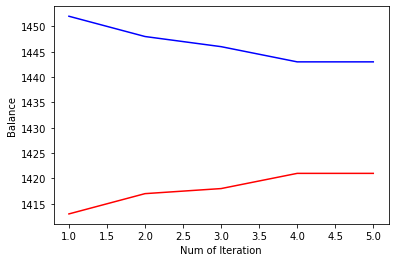

In [80]:
#красная линия: число + циклов
#синяя линия: число - циклов

plt.plot(range(1, 6), [i[0] for i in balances], color='red')
plt.plot(range(1, 6), [i[1] for i in balances], color='blue')
plt.xlabel("Num of Iteration")
plt.ylabel("Balance")

In [78]:
print("Удалённые рёбра: ", deleted_edges)

Удалённые рёбра:  [[(4, 98), (71, 94), (23, 47), (28, 55), (3, 44)], [(45, 95), (12, 86), (18, 25), (30, 52), (46, 52)], [(9, 82), (0, 66), (47, 96), (2, 37), (51, 68)], [(74, 98), (50, 94), (15, 34), (1, 89), (46, 92)], [(26, 47), (7, 35), (90, 93), (15, 25), (29, 40)]]


In [79]:
print("Добавленные рёбра: ", added_edges)

Добавленные рёбра:  [[(78, 55), (59, 23), (24, 80), (46, 61), (94, 21)], [(59, 17), (64, 61), (19, 21), (90, 73), (91, 37)], [(54, 36), (64, 75), (68, 10), (38, 62), (1, 55)], [(24, 83), (81, 44), (22, 55), (87, 41), (30, 21)], [(53, 77), (6, 30), (53, 50), (81, 37), (15, 41)]]
